In [3]:
#se importan las librerias
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib qt

nm=1e-9
um=1e-6
mm=1e-3
cm=1e-2

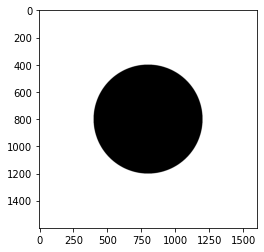

In [5]:
#Apertura circular
%matplotlib inline

radio =400
mask=np.ones((1600,1600),dtype="uint8")

cv2.circle(mask,(800,800),radio,0,-1)  #Radio del obstaculo es de x *10um
plt.imshow(mask,cmap="gray")
plt.show()


In [6]:
#Transformada de Fresnel FFT
def TrFr(entrada,z,dx_0,dy_0,W_l):
    #Contenido frecuencial de la imagen (transformada de fourier)
    k= 2*np.pi/W_l
    N,M= np.shape(entrada)
    x=np.arange(-int(N/2),int(N/2),1)
    y=np.arange(-int(M/2),int(M/2),1)
    X, Y=np.meshgrid(x,y)
    X0, Y0=np.meshgrid(x,y)

    #concidion de buen muestreo
    dx=(W_l*z)/(M*dx_0)
    dy=(W_l*z)/(N*dy_0)

    fx=X0*(1/(N*dx_0))
    fy=Y0*(1/(M*dy_0))
    
    #Constante de U_0
    C1= (1j*(k/(2*z)))
    U_1 = entrada*np.exp(C1*(((X*dx_0)**2) + ((Y*dy_0)**2)))
    U_2 = np.fft.fft2(U_1)

    #Constantes de U_2
    C2= ((np.exp(1j*k*z))/(1j*W_l*z))
    C3= 1j*(k/(2*z))

    U_3= U_2*C2*np.exp(C3*(((fx*dx)**2) + ((fy*dx)**2)))
    
    return np.fft.fftshift(U_3)
    


In [6]:
#Transformada de Fresnel FFT Modificada
def TrFrM(entrada,z,dx_0,dy_0,W_l):
    #Contenido frecuencial de la imagen (transformada de fourier)
    k= 2*np.pi/W_l
    N,M= np.shape(entrada)
    x=np.arange(-int(N/2),int(N/2),1)
    y=np.arange(-int(M/2),int(M/2),1)
    X, Y=np.meshgrid(x,y)
    X0, Y0=np.meshgrid(x,y)

    #concidion de buen muestreo
    dx=(W_l*z)/(M*dx_0)
    dy=(W_l*z)/(N*dy_0)

    fx=X0*(1/(N*dx_0))
    fy=Y0*(1/(M*dy_0))
    
    #Constante de U_0
    C1= (1j*(k/(2*z)))
    U_1 = entrada*np.exp(C1*(((X*dx)**2) + ((Y*dy)**2)))
    U_2 = np.fft.fft2(U_1)

    #Constantes de U_2
    C2= ((np.exp(1j*k*z))/(1j*W_l*z))
    C3= 1j*(k/(2*z))

    U_3= U_2*C2*np.exp(C3*(((fx*dx_0)**2) + ((fy*dx_0)**2)))
    
    return np.fft.fftshift(U_3)

In [7]:
# ESPECTRO ANGULAR POR FFT
def AngFT(entrada,z,dx,dy,wavelength):
    k=2*np.pi/wavelength
    U_0=entrada
    A_0=np.fft.fftshift(np.fft.fft2(U_0))
    N,M= np.shape(U_0)
    x=np.arange(-int(N/2),int(N/2),1)
    y=np.arange(-int(M/2),int(M/2),1)
    X, Y=np.meshgrid(x,y)

    #dimensiones de mundo en frecuencias
    fx=X*(1/(N*dx))
    fy=Y*(1/(M*dy))

    #transferencia
    H=np.exp(1j*k*z* np.emath.sqrt( 1 - (wavelength**2)*(fx**2+fy**2)  ))
    A_z=A_0*H
    U_z=np.fft.ifft2(A_z)
        
    return U_z


In [15]:
def NumZ(W_l,n,r):    
    z = ((r**2)/W_l)*(1/n)
    return z    
def Radio(W_l,z,n):    
    R = np.sqrt(W_l*z*n)
    return R 
def separación(W_l,r,n):    
    R = ((r**2))/(W_l*n)
    return R 
def NumF(W_l,r,z):
    return ((2*r)**2)/(z*W_l)

Z=0.002527646129541864
print("Radio obstaculo:",Radio(633*nm,0.020,1264))
print("N zonas por obstaculo:",NumZ(633*nm,306.25,700*um))
print(separación(633*nm,4*mm,1000))

print(NumF(633*nm,radio*10*um,0.02527646129541864))

print("Z limite:",(np.shape(mask)[0]*(1*um**2))/(633*nm))

Radio obstaculo: 0.004000279990200686
N zonas por obstaculo: 0.002527646129541864
0.02527646129541864
3999.9999999999995
Z limite: 0.0025276461295418644


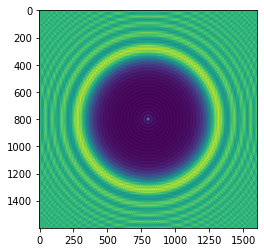

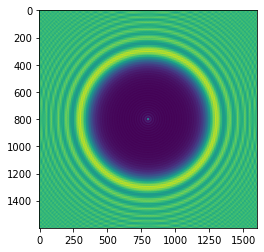

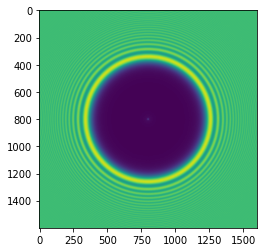

In [14]:
# Experimento de arago empelando Difracción angular y Transformada de fresnel a diferentes distancias

Z= 15*mm
plt.imshow(np.abs(((AngFT(mask,Z*2,1*um,1*um,633*nm))))**2)
plt.show()
plt.imshow(np.abs(((AngFT(mask,Z*1.5,1*um,1*um,633*nm))))**2)
plt.show()
plt.imshow(np.abs(((AngFT(mask,Z/2,1*um,1*um,633*nm))))**2)
plt.show()




### Onda Esferica ideal

$\huge{\psi(r,t)= (\frac{A}{r}e^{ik(r\pm ct)}}$

### Onda Esferica ideal

$\huge{\psi(r,t)= (\frac{A}{r}e^{ik(r\pm ct)}}$

$\huge{U(p)=\frac{Ae^ikr_{0}}{r_{0}}\int_{}\int_{s}^{}\frac{e^iks}{s}K(X)dS}$

Where

$K(X) = \frac{i}{2\lambda}(1+cos(X))$

considero la simetria azimutal de $\phi$ 

$dS = \frac{r_0}{r_0 + b}s ds d\phi$

$N_{f} = \frac{R^{2}}{\lambda}(\frac{1}{a}+ \frac{1}{b})$

$\huge{U_j(p)=-\frac{2\pi i}{k}K_j\frac{Ae^{ikr_0}}{r_0+b}e^{ikj\lambda/2}}(1-e^{-ik\lambda/2})$

Considerando $k=2\pi$

$U_j(p)=2i\lambda (-1)^{j+1}K_j\frac{Ae^{ik(r_0+b)}}{r_0+b}$


empleando metodo de Schuster*

$U(p)=2i\lambda\frac{Ae^{ik(r_0+b)}}{r_0+b} \sum_{j-1}^{n}{(-1)^{j+1}K_j}$

llegamos a

$U(p)=i\lambda (K_1 \pm K_n)\frac{Ae^{ik(r_0+b)}}{r_0+b}$

Cuando estamos en la ultima zona de fresnel con $X = \pi / 2$ K se hace $ K_n=0$

$U(p)=\frac{1}{2}U_1(p)$


$U(p) = 2i\lambda \frac{Ae^{ik(r_0+b)}}{r_0+b}[K_1 - K_2 + K_3 - ....]$


In [17]:
X = np.linspace(0,5*mm,1000)
Barrido = (np.abs(AngFT(mask,X,1*um,1*um,633*nm))**2)[800,800]
plt.plot(Barrido)

ValueError: operands could not be broadcast together with shapes (1000,) (1600,1600) 